In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
d1=pd.read_csv("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/clustering/crime_data.csv")
d1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
d1.shape

(50, 5)

In [5]:
d1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
x=d1.iloc[:,1:]
x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


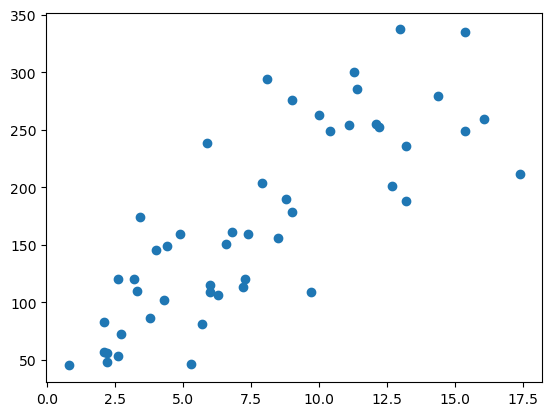

In [7]:
plt.scatter(d1.iloc[:,1],d1.iloc[:,2])
plt.show()

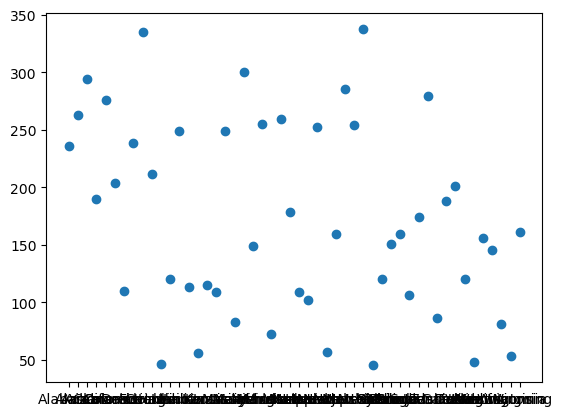

In [8]:
plt.scatter(d1.iloc[:,0], d1.iloc[:,2])

In [9]:
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [10]:
#hierarchical clustering

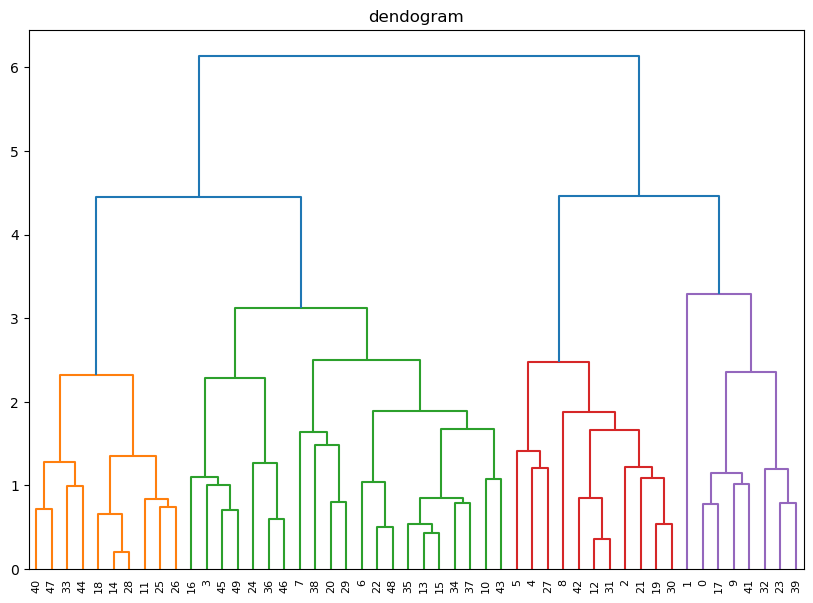

In [11]:
plt.figure(figsize=(10,7))
plt.title("dendogram")
dend=shc.dendrogram(shc.linkage(x,method="complete"))
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="complete")
y=agg.fit_predict(x)
y=pd.DataFrame(y)
y.value_counts()

1    31
0    19
Name: count, dtype: int64

In [13]:
 #kmeans clustering

In [14]:
# Find the optimal number of clusters using the elbow method
wcss = []#inertia
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

Text(0, 0.5, 'WCSS')

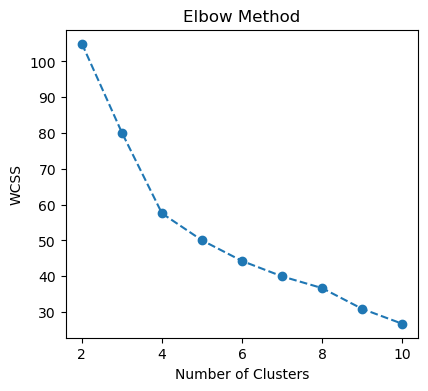

In [15]:
# Plot the elbow method graph
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [16]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters = 4, n_init=30)
KMeans.fit(x)
Y = KMeans.predict(x)
Y = pd.DataFrame(Y)
Y[0].value_counts()

C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0
0    16
1    13
2    13
3     8
Name: count, dtype: int64

In [17]:
#===============dbscan===============

In [19]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.70,min_samples=3)
dbscan.fit(x)
cl=pd.DataFrame(dbscan.labels_,columns=["cluster"])
cl.value_counts()
clustered=pd.concat([d1,cl],axis=1)
noise_data=clustered[clustered["cluster"]==-1]
final_data=clustered[clustered["cluster"]==0]

In [20]:
noise_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [21]:
final_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
37,Pennsylvania,6.3,106,72,14.9,0
